In [1]:
# part 1 
# basic definition 

import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import pickle

"""from pyvis.network import Network
from PyQt5.QtCore import QDateTime, Qt, QTimer
from PyQt5.QtWidgets import (QApplication, QCheckBox, QComboBox, QDateTimeEdit,
        QDial, QDialog, QGridLayout, QGroupBox, QHBoxLayout, QLabel, QLineEdit,
        QProgressBar, QPushButton, QRadioButton, QScrollBar, QSizePolicy,
        QSlider, QSpinBox, QStyleFactory, QTableWidget, QTabWidget, QTextEdit,
        QVBoxLayout, QWidget, QToolTip, QTableWidget, QTableWidgetItem)
from PyQt5.QtGui import QIcon, QPixmap
from PyQt5.QtGui import QFont"""

'from pyvis.network import Network\nfrom PyQt5.QtCore import QDateTime, Qt, QTimer\nfrom PyQt5.QtWidgets import (QApplication, QCheckBox, QComboBox, QDateTimeEdit,\n        QDial, QDialog, QGridLayout, QGroupBox, QHBoxLayout, QLabel, QLineEdit,\n        QProgressBar, QPushButton, QRadioButton, QScrollBar, QSizePolicy,\n        QSlider, QSpinBox, QStyleFactory, QTableWidget, QTabWidget, QTextEdit,\n        QVBoxLayout, QWidget, QToolTip, QTableWidget, QTableWidgetItem)\nfrom PyQt5.QtGui import QIcon, QPixmap\nfrom PyQt5.QtGui import QFont'

In [2]:
# this will decide the color map
nwtype = 'empirical_study'#'definition'

TODO: color map for answered or unanswered questions/statements

In [7]:
# part 2
# import the data pickle version

# import from the database
pickfile='love_chinese'
f = open('database/%s.p'%pickfile,'rb')
mydict = pickle.load(f)
f.close()

# divde the node and link 
[dic_node, dic_link] = mydict

# build the networkx version of the database 
Q = nx.Graph() # for networkx 
N = nx.Graph() # for html building by 

# set the color map 
color_map = []
rgb_map=[]
title_name = []

# add nodes into the graph
(row, col) = dic_node.shape
for index in range(row):
    nd_id = dic_node.iloc[index]['id']
    nd_content = dic_node.iloc[index]['content']
    nd_feature = dic_node.iloc[index]['feature']
    nd_label = dic_node.iloc[index]['label']
    nd_reference = dic_node.iloc[index]['reference']
    Q.add_node(nd_id,feature=nd_feature,content=nd_content,label=nd_label,reference=nd_reference)
    N.add_node(nd_label,feature=nd_feature,content=nd_content,reference=nd_reference)
    
    # build the color map 
    if nwtype == 'definition':
        if nd_feature == 'Central question':
            rgb_map.append({'r': 205, 'g': 37, 'b': 38, 'a': 0})
            color_map.append('red')
            title_name = nd_label
        elif nd_feature == 'Question':
            rgb_map.append({'r': 205, 'g': 137, 'b': 38, 'a': 0})
            color_map.append('orange')
        else:
            rgb_map.append({'r': 144, 'g': 202, 'b': 249, 'a': 0})
            color_map.append('blue')
            
    elif nwtype == 'empirical_study':        
        if nd_feature == 'Central question':
            rgb_map.append({'r': 205, 'g': 37, 'b': 38, 'a': 0})
            color_map.append('red')
            title_name = nd_label
        elif nd_feature == 'Question':
            rgb_map.append({'r': 205, 'g': 137, 'b': 38, 'a': 0})
            color_map.append('orange')
        elif nd_feature == 'Answer':
            rgb_map.append({'r': 144, 'g': 202, 'b': 249, 'a': 0})
            color_map.append('blue')
        elif nd_feature == 'Statement':
            rgb_map.append({'r': 199, 'g': 129, 'b': 32, 'a': 0})
            color_map.append('green')
        
# add links into the graph
(row, col) = dic_link.shape
for index in range(row):
    lk_id = dic_link.iloc[index]['id']
    lk_from = dic_link.iloc[index]['start']
    lk_to = dic_link.iloc[index]['end']
    lk_label = dic_link.iloc[index]['label']
    Q.add_edge(lk_from,lk_to,label=lk_label,id_lk=lk_id)
    
# #     index_from = dic_node.index[dic_node['id']==lk_from].tolist()
#     index_from = dic_link[dic_link['id']==lk_from].index.values.astype(int)
# #     index_from = int(index_from)
#     lk_from_n = dic_node.iloc[index_from]['label']
# #     index_to = dic_node.index[dic_node['id']==lk_to].tolist()
#     index_to = dic_link[dic_link['id']==lk_to].index.values
# #     index_to = int(index_to)
#     lk_to_n = dic_node.iloc[index_to]['label']
    lk_from_n = dic_node.loc[dic_node['id']==lk_from,'label'].values[0]
    lk_to_n = dic_node.loc[dic_node['id']==lk_to,'label'].values[0]
    
    N.add_edge(lk_from_n,lk_to_n,label=lk_label)

/Users/zhiwei/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/zhiwei/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/zhiwei/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/zhiwei/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:861: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


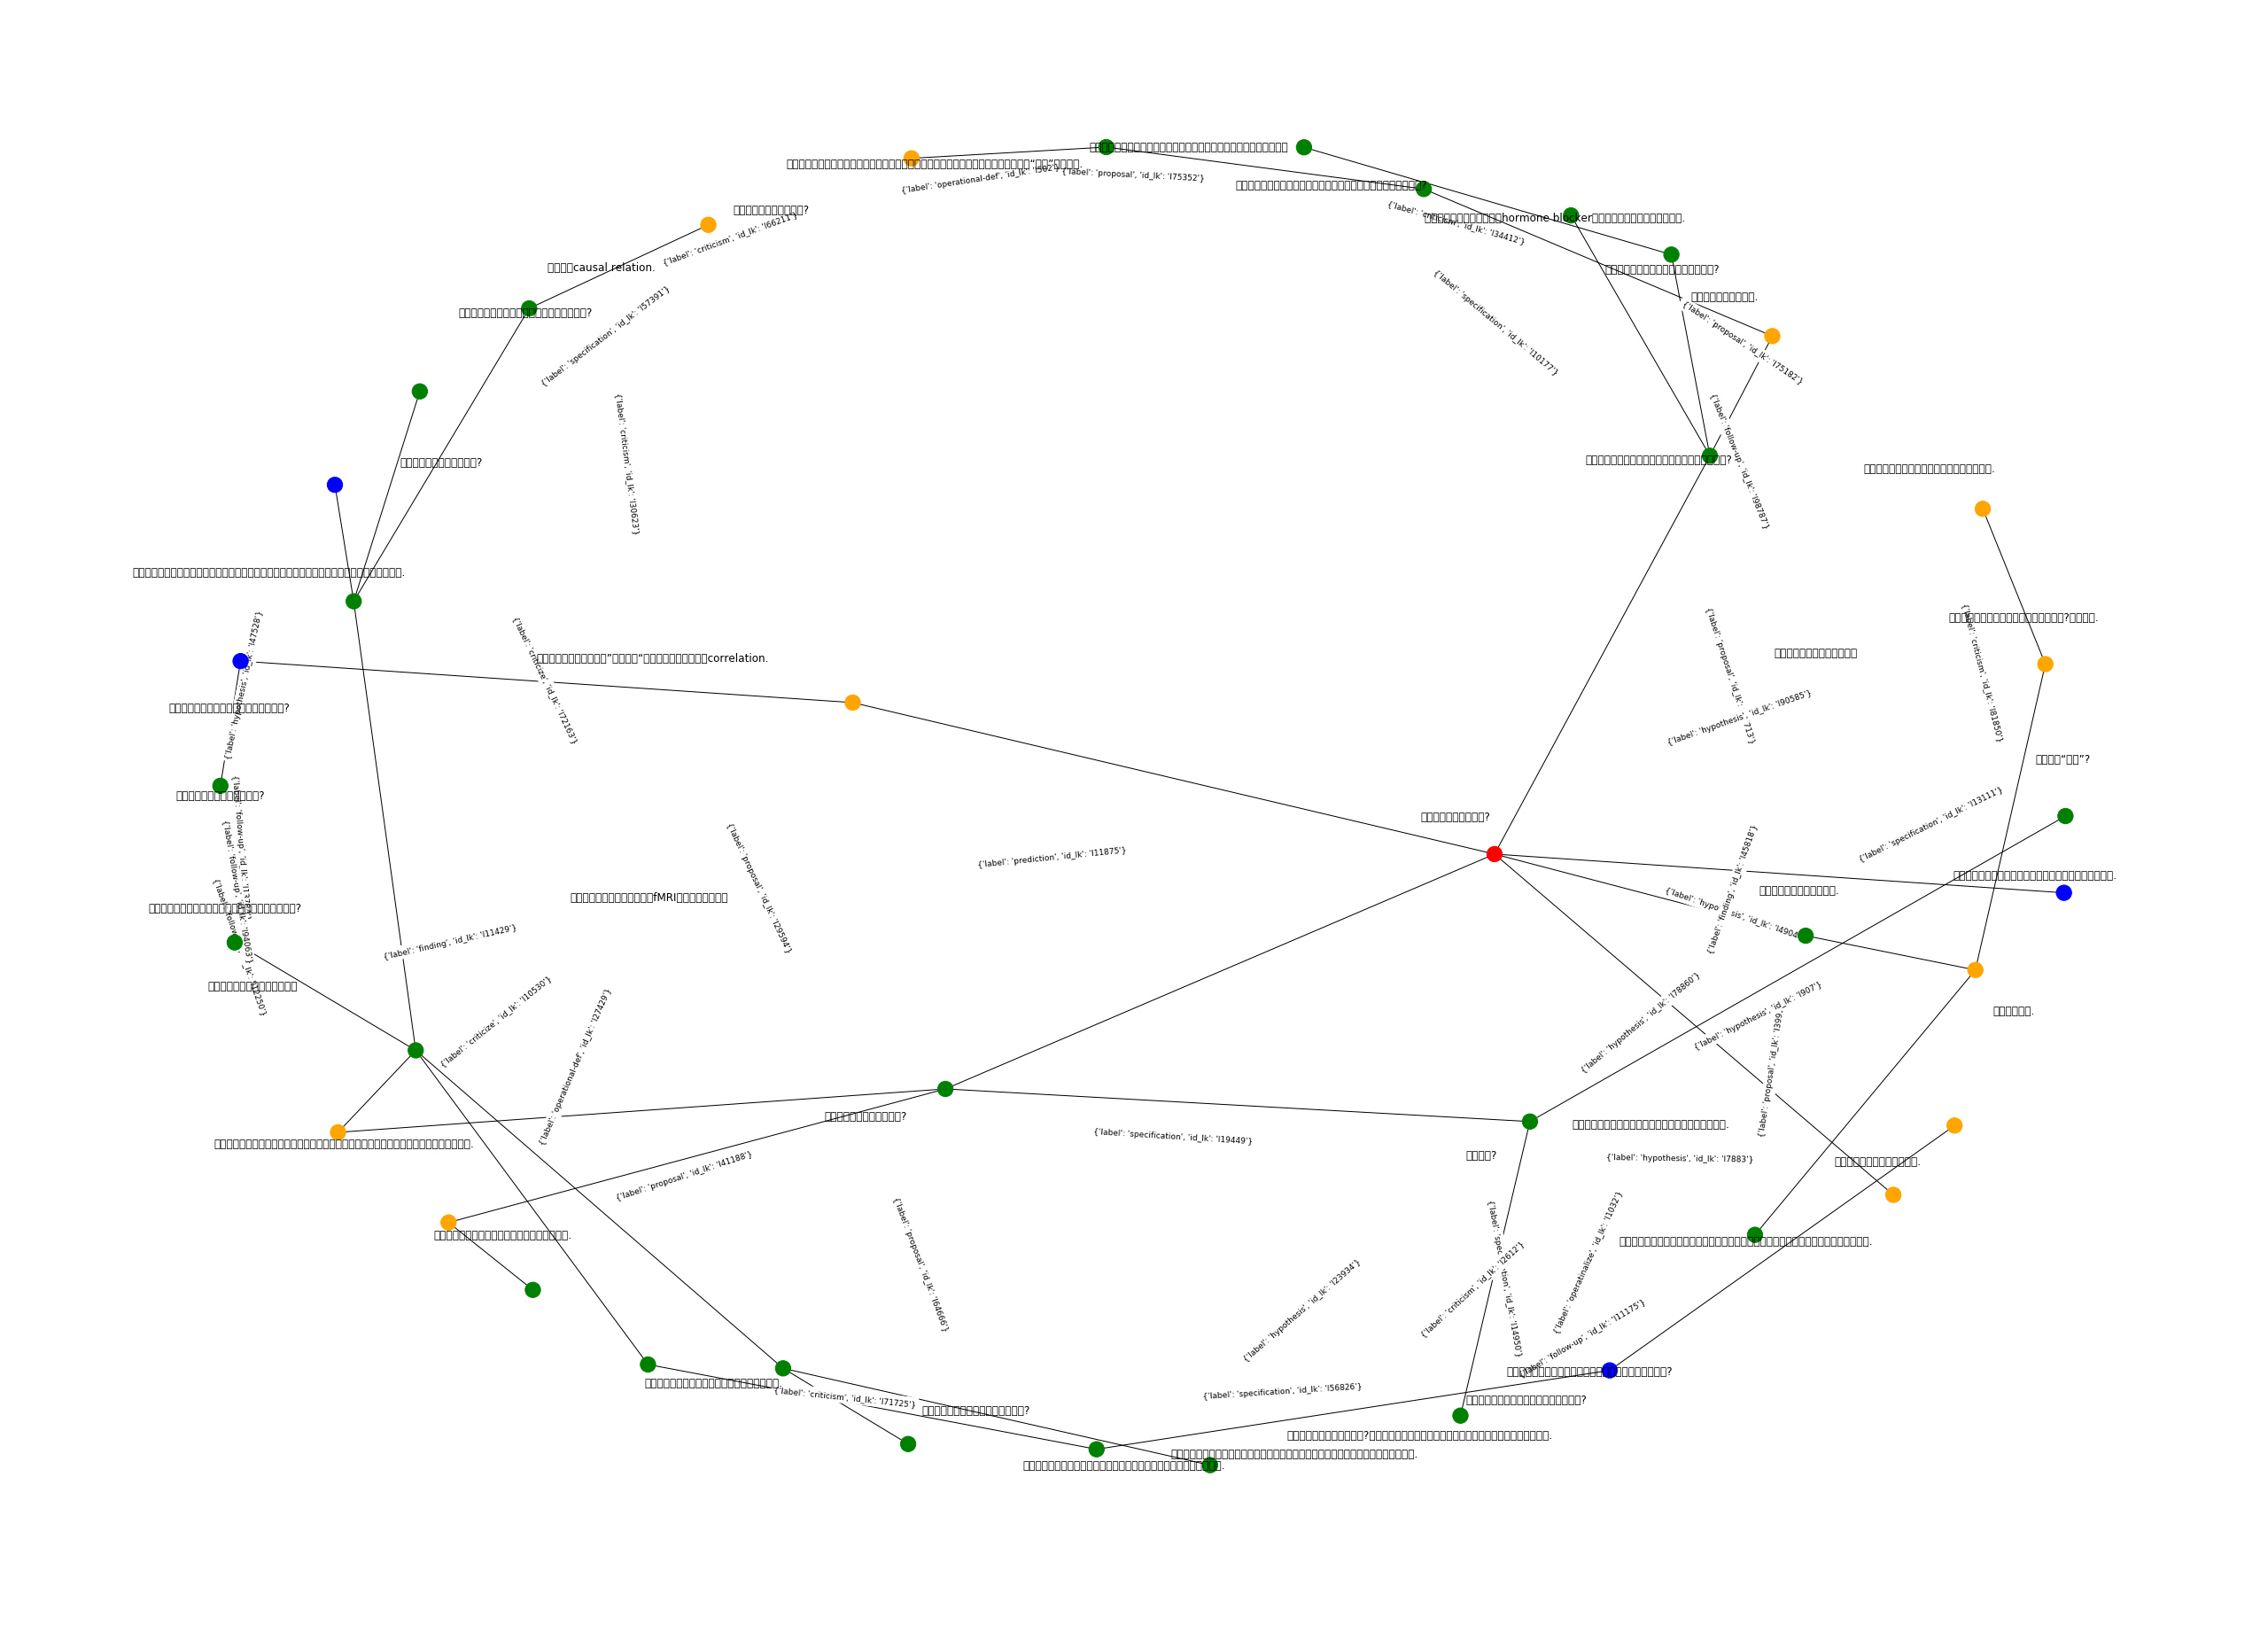

In [8]:
# part 3
# save the networkx as graph and html 

fig = plt.figure(frameon=False)
fig.set_size_inches(35, 25) 
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

#pos = nx.kamada_kawai_layout(Q) # temp: err
pos=nx.spring_layout(Q)
nx.draw_networkx(Q,node_color=color_map,arrows=True,arrowstyle='->',arrowsize=25,with_labels=False)#pos
node_labels = nx.get_node_attributes(Q,'label')
# nx.draw_networkx_labels(Q,pos,labels=node_labels,font_size = 24)
edge_labels = nx.get_edge_attributes(Q,'label')
# nx.draw_networkx_edge_labels(Q, pos, labels = edge_labels,font_size = 12)
# nx.draw(Q,with_labels = True,font_weight = 'bold',node_size = 1000,node_color='green',node_shape='h')


for kn,n in enumerate(Q.node):
    Q.node[n]['viz']={'color':rgb_map[kn]}
# save and illustration
# fig.savefig('QuestionNet8.png', dpi=100)
# plt.show()

title_name = title_name.replace('?','')
simple = 'QN_simple_' + title_name + '.png'
fig.savefig(simple, dpi=100)
        
# draw the full graph
nx.draw_networkx_labels(Q,pos,labels=node_labels,font_size = 12)#pos
nx.draw_networkx_edge_labels(Q,pos, labels = edge_labels,font_size = 9)#pos
        
full = 'QN_full_'+ title_name +'.png'
fig.savefig(full, dpi=100)
plt.show()

# generate the html version of the graph via pyviz
"""g = Network(height="100%", width="100%", bgcolor="#222222", font_color="white")

g.from_nx(N)
g.toggle_drag_nodes(True)
# g.toggle_stabilization(True)
g.toggle_hide_edges_on_drag(False)
g.toggle_hide_nodes_on_drag(True)
g.toggle_physics(True)
g.toggle_stabilization(False)
# EdgeOptions.toggle_smoothness(smooth_type = 'curvedCCW')
g.barnes_hut(gravity=-8000,central_gravity=0.3,spring_length=100,spring_strength=0.001,damping=0.09,overlap=0)
# g.force_atlas_2based(gravity=-50,central_gravity=0.01,spring_length=100,spring_strength=0.08,damping=0.4,overlap=0)
# g.hrepulsion(node_distance=120,central_gravity=0.0,spring_length=100,spring_strength=0.01,damping=0.09)
html = 'QN_html_'+title_name+'.html'
g.show(html)"""

# generate gephi compatible gexf version of graph
nx.write_gexf(Q,'database/QN_%s.gexf'%title_name)